## Screen Capture

In [16]:
def one_time():
    import pyscreenshot as ImageGrab
    import time

    images_folder = "captured_images/9/"
    for i in range(0,6):     # for drawing 0 - 5 times 
       time.sleep(8)           # time to draw
       im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2   where it will capture 
       print("saved......",i)
       im.save(images_folder+str(i)+'.png')
       print("clear screen now and redraw now........")

saved...... 0
clear screen now and redraw now........
saved...... 1
clear screen now and redraw now........
saved...... 2
clear screen now and redraw now........
saved...... 3
clear screen now and redraw now........
saved...... 4
clear screen now and redraw now........
saved...... 5
clear screen now and redraw now........


In [17]:
# install several packages
# pip install opencv-python
# pip install pandas
# pip install scikit-learn


# Generate DataSet

In [19]:
import cv2
import csv
import glob

In [20]:
# 1 to drawn region and 0 to dataset region (blank)
# created my own dataset
header = ["label"]
for i in range(0, 784):
    header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:     # created 1 csv separarted value file
    writer = csv.writer(f)              # open in typing mode
    writer.writerow(header)
# for inserting values from folders
for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
    #to iterate on folder path
    for img_path in dirList:
       im = cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)  # grayscale is only one channel
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
       
       data=[]
       data.append(label)
       rows, cols = roi.shape
       
       ## Add pixel one by one into data array
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)
 
#load the dataset
import pandas as pd
from sklearn.utils import shuffle
data = pd.read_csv('dataset.csv')
data = shuffle(data)
data
        

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Separation of dependent and independent variable

In [21]:
X = data.drop(["label"],axis=1)
Y = data["label"]

6


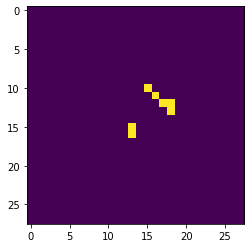

In [24]:
#preview of one image using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 41
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [23]:
#Train-Test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [26]:
#Fit the model using svc and also to save the model using joblib
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [29]:
#calculate accuracy
from sklearn import metrics
prediction=classifier.predict(test_x)  #don't require y so haven't pass
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.16666666666666666


In [30]:
#prediction of image drawn in paint
 
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
 
model=joblib.load("model/digit_recognizer")
image_folder="img/"
 
while True:
   img=ImageGrab.grab(bbox=(60,170,400,500))
   
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray = cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
   rows,cols=roi.shape
   
   X = []
   
   ## Add pixel one by one into data array
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
           
   predictions = model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 0


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 3


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 7


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 7


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 7


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 7


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 7


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 0


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 0


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 0


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 0


KeyboardInterrupt: 